### GPUチェック

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4996643362990644667, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15505193728
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1607280321220861347
 physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"]

### ライブラリのインポート

In [2]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

import time
from sklearn.decomposition import TruncatedSVD

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

### シード値

In [3]:
SEED = 7
TEST_RATE = 0.3

### データセットの作成

In [4]:
dataset = fetch_20newsgroups(shuffle=True, random_state=SEED)

In [5]:
name_list = list(dataset.target_names)

In [6]:
name_list

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
df = pd.DataFrame(dataset.data)
df.columns = ["text"]
df["test_num"] = dataset.target
df["test"] = [name_list[i] for i in df["test_num"]]
df.head()

,text,test_num,test
0,From: clay@cs.scarolina.edu (F Rodney Clay)\nS...,5,comp.windows.x
1,From: merlin@neuro.usc.edu (merlin)\nSubject: ...,1,comp.graphics
2,From: battle@cs.utk.edu (David Battle)\nSubjec...,6,misc.forsale
3,From: vojak@icebucket.stortek.com (Bill Vojak)...,16,talk.politics.guns
4,From: fcrary@ucsu.Colorado.EDU (Frank Crary)\n...,16,talk.politics.guns


In [8]:
df.iloc[0, 0]

"From: clay@cs.scarolina.edu (F Rodney Clay)\nSubject: Slider Position of Vertical Scrollbars\nSummary: Slider Position of a List Widget's Vertical Scrollbar\nOrganization: USC  Department of Computer Science\nDistribution: comp\nLines: 10\n\nI need help positioning the slider of a List widget's horizontal scrollbar.  I am displaying the full\npath of a selected file in a list widget.  The horizontal's slider defaults to the left side of the\nlist widget; however, I need the slider on the right side.  This is so the user can SEE the file name\nthey selected.  I know it's possible, because when files are displayed in a file selection dialog box,\nthe slider is on the right side.\n\nThanking any and all who can help in advance,\nRodney F. Clay\n\nclay@cs.scarolina.edu\n"

### カウントベクタライザー

In [9]:
start = time.time()

vec_count = CountVectorizer()
train = vec_count.fit_transform(df["text"])
X_train, X_test, y_train, y_test = train_test_split(train, df["test_num"], test_size=TEST_RATE, random_state=SEED)
model = linear_model.RidgeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred, average = 'micro'))

print(f"elapsed_time:{time.time() - start}[sec]")

0.8606774668630339
elapsed_time:309.4494295120239[sec]


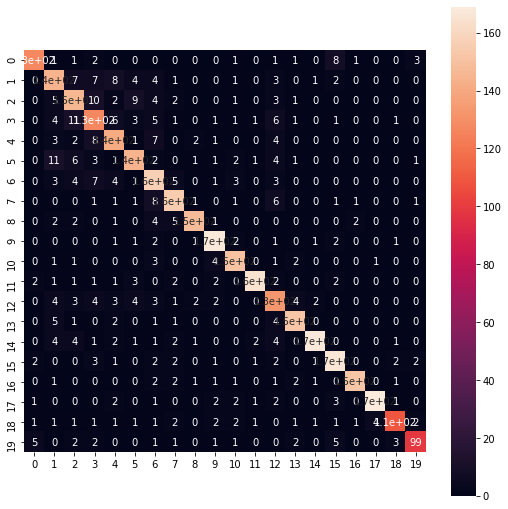

In [10]:
plt.figure(figsize=(9, 9))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True,  square=True)

### TruncatedSVD で次元削減

In [11]:
vec_count = CountVectorizer()
train = vec_count.fit_transform(df["text"])

for i in [10,  100,  500, 1000]:
    start = time.time()

    svd = TruncatedSVD(n_components=i, random_state=SEED)
    feature = svd.fit_transform(train)
    X_train, X_test, y_train, y_test = train_test_split(feature, df["test_num"], test_size=TEST_RATE, random_state=SEED)
    model = linear_model.RidgeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"n_components:{i},  f1スコア {f1_score(y_test, y_pred, average = 'micro')}")
    print(f"n_components:{i} elapsed_time:{time.time() - start}[sec]")

n_components:10,  f1スコア 0.1434462444771723
n_components:10 elapsed_time:1.4764349460601807[sec]
n_components:100,  f1スコア 0.49867452135493373
n_components:100 elapsed_time:7.393319368362427[sec]
n_components:500,  f1スコア 0.7620029455081001
n_components:500 elapsed_time:34.03617548942566[sec]
n_components:1000,  f1スコア 0.8244477172312223
n_components:1000 elapsed_time:71.8913516998291[sec]


### Tfidf ベクタライザー

In [12]:
start = time.time()

vec_tfidf = TfidfVectorizer()
train = vec_tfidf.fit_transform(df["text"])
X_train, X_test, y_train, y_test = train_test_split(train, df["test_num"], test_size=TEST_RATE, random_state=SEED)
model = linear_model.RidgeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred, average = 'micro'))

print(f"elapsed_time:{time.time() - start}[sec]")

0.9248895434462445
elapsed_time:6.689754486083984[sec]


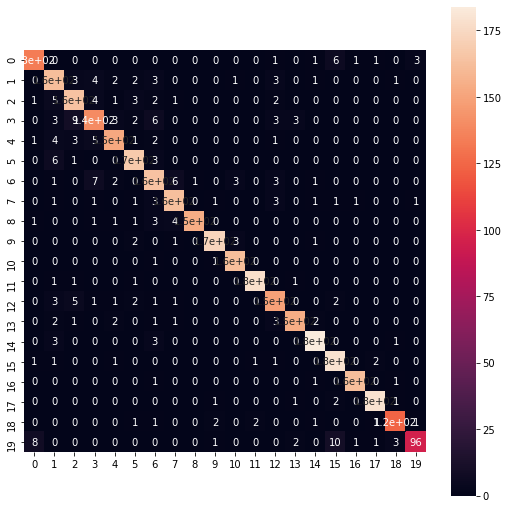

In [13]:
plt.figure(figsize=(9, 9))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True,  square=True)